This is going to be the similar mass case with circular orbit and then implement Df equation with that


How this Jupyter Notebook will look like:
- Initialize the packets
- initial conditions
- dictate the circular orbit
- forloop
- effective energy plot (coming soon)

In [ ]:
#Naazneen Shafeer Vemmerath Kulangara 
#USC
#PHYS 304

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import astropy.constants as const
import math

In [35]:
plt.rcParams['font.family'] = 'Times New Roman'
#this is to make the font of the plots to be Times New Roman

This is going to be the initial conditions

In [ ]:
# region Code Snippet 1: IC's
G = const.G 
m_gal = 1e11 * const.M_sun
#Masses
m1=1e6 * const.M_sun #mass of black hole A 
m2=1e8 * const.M_sun #mass of black hole B
#r_i
r1_initial=[.5e3,0,0] * u.pc
r2_initial=[-.5e3,0,0] * u.pc
#To arrays
r1=np.array(r1_initial,dtype="float64") * u.pc
r2=np.array(r2_initial,dtype="float64") * u.pc

#COM
r_com=(m1*r1+m2*r2)/(m1+m2)
#V_i
v1_initial=[0,0.25e3, 0] *u.km/u.s
v2_inital=[0,-0.25e3,0] *u.km/u.s #km/s

# v1 = v1.to(u.m / u.year)
# v2 = v2.to(u.m / u.year)

#To arrays
v1=np.array(v1_initial,dtype="float64") *u.km/u.s
v2=np.array(v2_inital,dtype="float64") *u.km/u.s
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

r = np.sqrt((r2[0] - r1[0])** 2 + (r2[1] - r1[1])** 2 + (r2[2] - r1[2])** 2)

# endregion

[  0. 250.   0.] km / s [   0. -250.    0.] km / s


Dynamical Friction and adding them as each component:

In [38]:
T = 5 * u.Gyr
N = 5000
delta_t = T/ N


dv1bydt= ((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) 
dv2bydt= ((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) 
dr1bydt = v1  # maybe we don't need df subtraction here
dr2bydt = v2 
r_derivs=np.concatenate((dr1bydt.value,dr2bydt.value))
derivs=np.concatenate((r_derivs,dv1bydt.value,dv2bydt.value))

time_span=np.linspace(0, T, N) #Work on this with Kris' link

In [39]:
c = 100

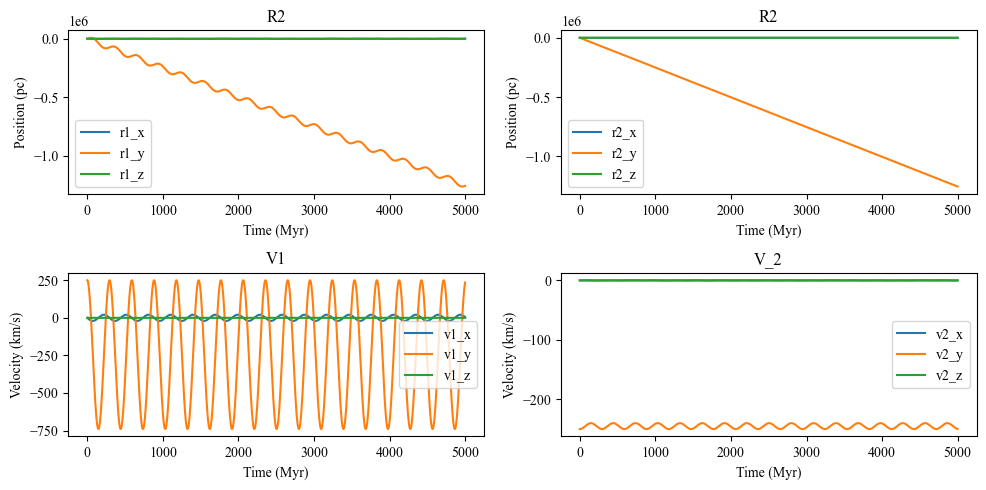

[<Quantity [-490.0990099 , -250.61510975,    0.        ] pc>, <Quantity [-490.0990099, -501.2302195,    0.       ] pc>, <Quantity [-490.0990099 , -751.84532925,    0.        ] pc>, <Quantity [ -490.0990099 , -1002.46043901,     0.        ] pc>, <Quantity [ -490.0990099 , -1253.07554876,     0.        ] pc>, <Quantity [ -490.0990099 , -1503.69065851,     0.        ] pc>, <Quantity [ -490.0990099 , -1754.30576826,     0.        ] pc>, <Quantity [ -490.0990099 , -2004.92087801,     0.        ] pc>, <Quantity [ -490.0990099 , -2255.53598776,     0.        ] pc>, <Quantity [ -490.0990099 , -2506.15109751,     0.        ] pc>, <Quantity [ -490.0990099 , -2756.76620726,     0.        ] pc>, <Quantity [ -490.0990099 , -3007.38131702,     0.        ] pc>, <Quantity [ -490.0990099 , -3257.99642677,     0.        ] pc>, <Quantity [ -490.0990099 , -3508.61153652,     0.        ] pc>, <Quantity [ -490.0990099 , -3759.22664627,     0.        ] pc>, <Quantity [ -490.0990099 , -4009.84175602,     0.  

In [40]:
r1_sol = []
r2_sol = []
v1_sol = []
v2_sol = []
r_comsol = []



for i in range(N):
    dv1bydt=((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) 
    dv2bydt=((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) 
    v1 += dv1bydt * delta_t
    v2 += dv2bydt * delta_t

    r1 += v1.to(u.pc / u.s) * delta_t
    r2 += v2.to(u.pc / u.s) * delta_t
    # region Code Snippet 2: DF
    r1_com = r1 - r_com
    r2_com = r2 - r_com

    r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
    r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)

    r_com=(m1*r1+m2*r2)/(m1+m2)


    r1_sol.append(r1.copy())
    r2_sol.append(r2.copy())
    v1_sol.append(v1.copy())
    v2_sol.append(v2.copy())
    r_comsol.append(r_com.copy())


time_values = np.arange(0, N) * delta_t.to(u.Myr).value  # Convert delta_t to Myr or desired unit


r1_sol = np.array(r1_sol)  
r2_sol = np.array(r2_sol)  
v1_sol = np.array(v1_sol)  
v2_sol = np.array(v2_sol) 
rcom_sol = np.array(r_comsol)





# region
fig, axs = plt.subplots(2, 2, figsize=(10, 5))


axs[0, 0].plot(time_values, r1_sol[:, 0], label="r1_x")
axs[0, 0].plot(time_values, r1_sol[:, 1], label="r1_y")
axs[0, 0].plot(time_values, r1_sol[:, 2], label="r1_z")
axs[0, 0].set_title("R2")
axs[0, 0].set_xlabel("Time (Myr)")
axs[0, 0].set_ylabel("Position (pc)")
axs[0, 0].legend()


axs[0, 1].plot(time_values, r2_sol[:, 0], label="r2_x")
axs[0, 1].plot(time_values, r2_sol[:, 1], label="r2_y")
axs[0, 1].plot(time_values, r2_sol[:, 2], label="r2_z")
axs[0, 1].set_title("R2")
axs[0, 1].set_xlabel("Time (Myr)")
axs[0, 1].set_ylabel("Position (pc)")
axs[0, 1].legend()


axs[1, 0].plot(time_values, v1_sol[:, 0], label="v1_x")
axs[1, 0].plot(time_values, v1_sol[:, 1], label="v1_y")
axs[1, 0].plot(time_values, v1_sol[:, 2], label="v1_z")
axs[1, 0].set_title("V1")
axs[1, 0].set_xlabel("Time (Myr)")
axs[1, 0].set_ylabel("Velocity (km/s)")
axs[1, 0].legend()


axs[1, 1].plot(time_values, v2_sol[:, 0], label="v2_x")
axs[1, 1].plot(time_values, v2_sol[:, 1], label="v2_y")
axs[1, 1].plot(time_values, v2_sol[:, 2], label="v2_z")
axs[1, 1].set_title("V_2")
axs[1, 1].set_xlabel("Time (Myr)")
axs[1, 1].set_ylabel("Velocity (km/s)")
axs[1, 1].legend()


plt.tight_layout()
plt.show()

# endregion
    
print(r_comsol)

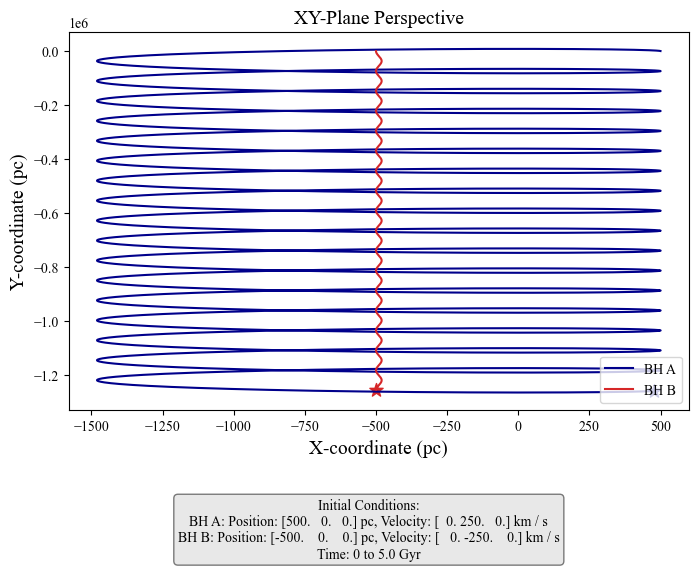

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the two black hole trajectories
ax.plot(r1_sol[:, 0], r1_sol[:, 1], color="darkblue", label="BH A")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], color="tab:red", label="BH B")

# Scatter plot for the last points (initial conditions)
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], color="darkblue", marker="*", s=100)
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], color="tab:red", marker="*", s=100)

# Add axis labels and title
ax.set_xlabel("X-coordinate (pc)", fontsize=14)
ax.set_ylabel("Y-coordinate (pc)", fontsize=14)
ax.set_title("XY-Plane Perspective", fontsize=14)

# Add initial conditions text
initial_conditions_text = (
    f"Initial Conditions:\n"
    f"BH A: Position: {r1_initial}, Velocity: {v1_initial}\n"
    f"BH B: Position: {r2_initial}, Velocity: {v2_inital}\n"
    f"Time: 0 to {T}"
)

# Adjust the position of the initial conditions text outside the plot area (below the plot)
fig.subplots_adjust(bottom=0.25)  # Increase bottom margin to make space
fig.text(0.5, 0.05, initial_conditions_text, fontsize=10, ha='center', va='center', 
         bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.5))

# Show the legend
ax.legend()

# Show the plot
plt.show()

Simulated Orbital Period: 0.295059 Gyr years


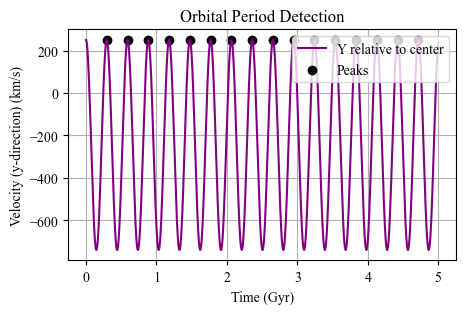

In [42]:
from scipy.signal import find_peaks
y_relative_to_center = v1_sol[:, 1]


peaks, _ = find_peaks(y_relative_to_center)

if len(peaks) >= 8:
    first_peak_time = time_span[peaks[0]]
    second_peak_time = time_span[peaks[1]]
    orbital_period = second_peak_time - first_peak_time
    orbital_period_years = orbital_period
    print(f"Simulated Orbital Period: {orbital_period_years:4f} years")


    plt.figure(figsize=(5, 3))
    plt.plot(time_span, y_relative_to_center, label='Y relative to center', color='purple')
    plt.scatter(time_span[peaks], y_relative_to_center[peaks], color='black', label='Peaks')
    plt.xlabel('Time (Gyr)')
    plt.ylabel('Velocity (y-direction) (km/s)')
    plt.title('Orbital Period Detection')
    plt.grid(True)
    plt.legend(loc = "upper right")
    plt.show()
else:
    print("Could not find two peaks to determine the orbital period.")


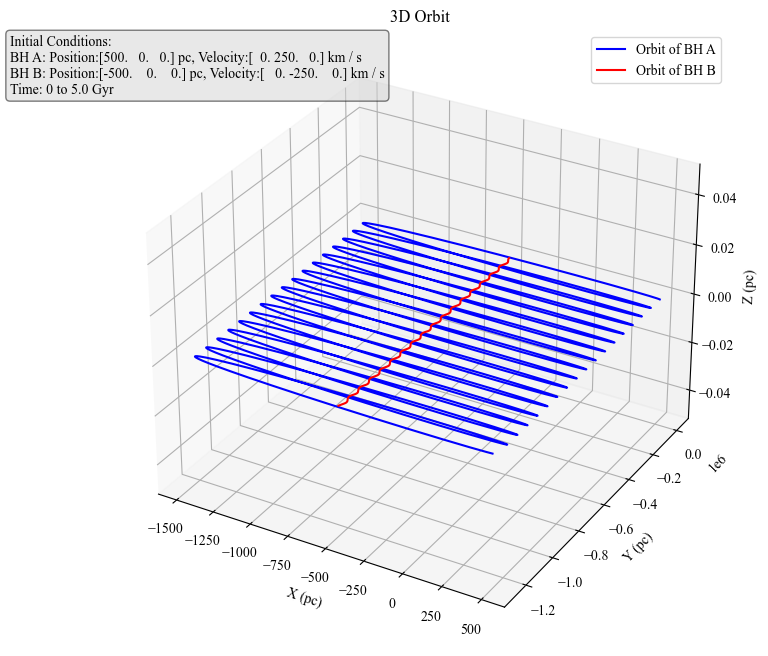

In [43]:
from mpl_toolkits.mplot3d import Axes3D  


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], label="Orbit of BH A", color="blue")


ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], label="Orbit of BH B", color="red")


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)') 
ax.set_zlabel('Z (pc)')
ax.set_title('3D Orbit')


ax.legend()

initial_conditions_text = (
    f"Initial Conditions:\n"
    f"BH A: Position:{r1_initial}, Velocity:{v1_initial}\n"
    f"BH B: Position:{r2_initial}, Velocity:{v2_inital}\n"
    f"Time: 0 to {T}"
)
fig.text(0, 0.8, initial_conditions_text, fontsize=10, bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.5))

plt.show()

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_39410/1506910204.py:24: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim([np.min(r1_sol[:, 2]), np.max(r1_sol[:, 2])])


Text(0, 0.8, 'Initial Conditions:\nBH A: Position:[500.   0.   0.] pc, Velocity:[  0. 250.   0.] km / s\nBH B: Position:[-500.    0.    0.] pc, Velocity:[   0. -250.    0.] km / s\nTime: 0 to 5.0 Gyr')

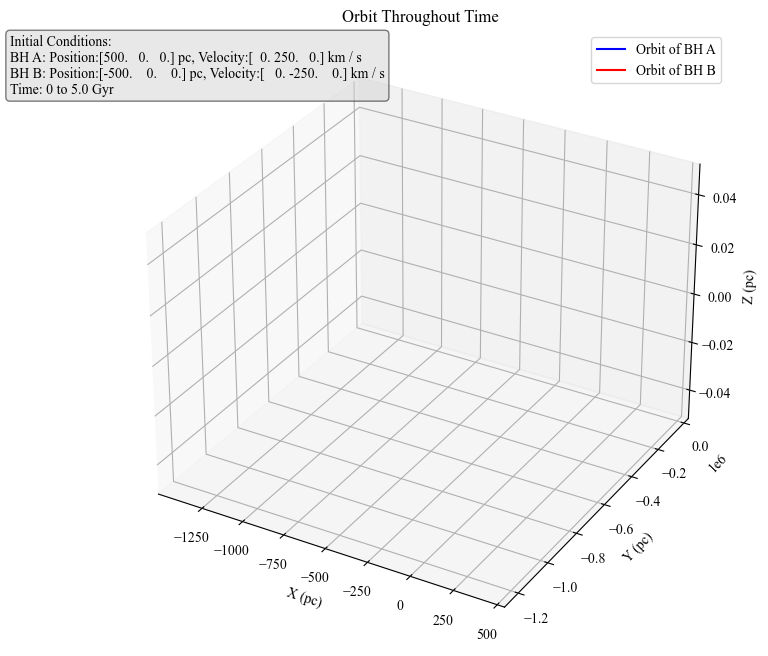

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('Orbit Throughout Time')


line1, = ax.plot([], [], [], label="Orbit of BH A", color="blue")
line2, = ax.plot([], [], [], label="Orbit of BH B", color="red")
ax.legend()

# Limits for the plot (adjust as needed based on data)
ax.set_xlim([np.min(r1_sol[:, 0]), np.max(r1_sol[:, 0])])
ax.set_ylim([np.min(r1_sol[:, 1]), np.max(r1_sol[:, 1])])
ax.set_zlim([np.min(r1_sol[:, 2]), np.max(r1_sol[:, 2])])


def update(num):

    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])
    
    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])
    
    return line1, line2

initial_conditions_text = (
    f"Initial Conditions:\n"
    f"BH A: Position:{r1_initial}, Velocity:{v1_initial}\n"
    f"BH B: Position:{r2_initial}, Velocity:{v2_inital}\n"
    f"Time: 0 to {T}"
)
fig.text(0, 0.8, initial_conditions_text, fontsize=10, bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.5))

# ani = FuncAnimation(fig, update, frames=len(r1_sol), interval=50, blit=True)


# plt.show()


# ani.save("circularorbitDF100#3.mp4", writer="ffmpeg", fps=60)  # Adjust fps as needed

Plot of Velocities

In [45]:
mu = const.G.value * (m1.value+m2.value)

In [46]:
def compute_eccentricity(r_p, r_a):
    return (r_a - r_p) / (r_a + r_p)

# Semi-major axis
def compute_semi_major_axis(r_p, r_a):
    return ((r_a + r_p) / 2)

# Semi-minor axis
def compute_semi_minor_axis(a, e):
    return a * np.sqrt(1 - e**2)

# Orbital period
def compute_orbital_period(a, mu):
    return np.sqrt((4 * np.pi**2 / mu) * a**3)

In [47]:
distance1 = np.linalg.norm(u.pc.to(u.m, r1_sol - rcom_sol), axis= 1)

p_distance1 = np.min(distance1)
a_distance1 = np.max(distance1)

distance2 = np.linalg.norm(u.pc.to(u.m, r2_sol - rcom_sol), axis = 1)

p_distance2 = np.min(distance2)
a_distance2 = np.max(distance2)


# Theoretical data
# Eccentricity and Semi-Major Axis for Black Hole A
r_p1 = p_distance1
r_a1 = a_distance1
eccentricity1 = compute_eccentricity(r_p1, r_a1)
a1 = compute_semi_major_axis(r_p1, r_a1)

# Eccentricity and Semi-Major Axis for Black Hole B
r_p2 = p_distance2
r_a2 = a_distance2
eccentricity2 = compute_eccentricity(r_p2, r_a2)
a2 = compute_semi_major_axis(r_p2, r_a2)

# Semi Minor Axis for Black Hole A and B
b1 = compute_semi_minor_axis(a1, eccentricity1)
b2 = compute_semi_minor_axis(a2, eccentricity2)

# Orbital periods of the black holes
T1 = compute_orbital_period(a1, mu)
T2 = compute_orbital_period(a2, mu)


print(f"Eccentricity of the A orbit: {round(eccentricity1, 4)}") #WOOOOOOOH IT IS  0 < EPSILON < 1 !!!!
print(f"Eccentricity of the B orbit: {round(eccentricity2, 4)}") 
print(f"Semi-Major Axis of the orbit A: {round(u.m.to(u.pc,a1), 6)} pc")
print(f"Semi-Major Axis of the orbit B: {round(u.m.to(u.pc, a2), 6)} pc")
print(f"Semi-Minor Axis of the orbit A: {round(u.m.to(u.pc, b1), 6)} pc")
print(f"Semi-Minor Axis of the orbit B: {round(u.m.to(u.pc, b2), 6)} pc")
print(f"Theoretical Orbital Period of BH A: {round(u.s.to(u.Gyr, T1), 6)} Gyrs")
print(f"Theoretical Orbital Period of BH B: {round(u.s.to(u.Gyr, T2), 6)} Gyrs")



Eccentricity of the A orbit: 0.92
Eccentricity of the B orbit: 0.92
Semi-Major Axis of the orbit A: 12371.953086 pc
Semi-Major Axis of the orbit B: 123.719531 pc
Semi-Minor Axis of the orbit A: 4849.744953 pc
Semi-Minor Axis of the orbit B: 48.49745 pc
Theoretical Orbital Period of BH A: 12.827517 Gyrs
Theoretical Orbital Period of BH B: 0.012828 Gyrs


The average energy would be 6.152737478903338e+48 J
The fractional energy would be 6.56030785251005e-17 J
Using the Fractional Energy method, we get the percent change of 6.549782938236603e-15 %


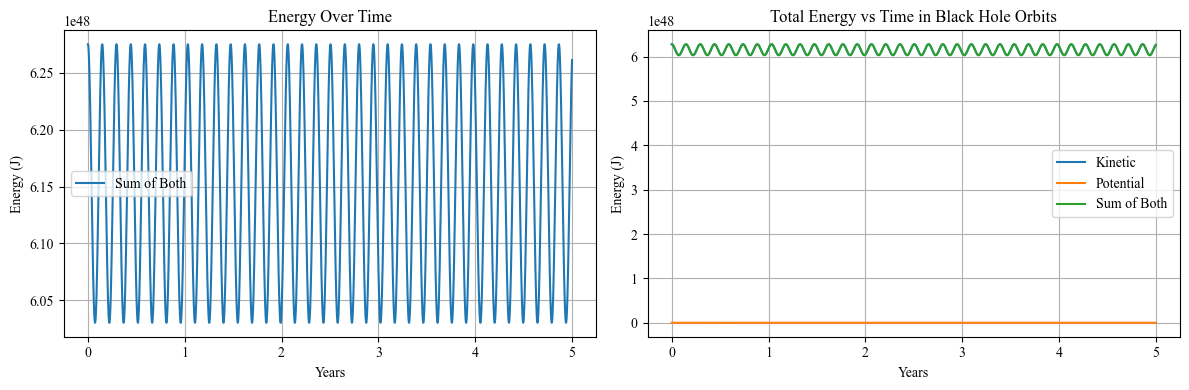

[6.27591885e+48 6.27569586e+48 6.27525009e+48 ... 6.25610464e+48
 6.25886406e+48 6.26143129e+48]
[-7.61697249e+44 -5.98356932e+44 -4.67588938e+44 ... -1.28748863e+44
 -1.38930534e+44 -1.50905272e+44]


In [48]:
v1_sol = u.km.to(u.m, v1_sol)
v2_sol = u.km.to(u.m, v2_sol)
r1_sol = u.pc.to(u.m, r1_sol)
r2_sol = u.pc.to(u.m, r2_sol)

KE = (0.5 * m1.value * np.sum(v1_sol**2, axis=1)) + (0.5 * m2.value * np.sum(v2_sol**2, axis=1))

V = (-const.G.value * (m1.value * m2.value)) / (np.linalg.norm(r1_sol - r2_sol, axis=1))

E = V + KE



time_span_year = time_span
avg_energy = np.mean(E)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# region Code Snippet 6: Energy Graph Plot

axs[0].plot(time_span_year, E, label = "Sum of Both")
axs[0].set_xlabel("Years")
axs[0].set_ylabel("Energy (J)")
axs[0].set_title("Energy Over Time")
axs[0].legend()
axs[0].grid()

# endregion
# region Code Snippet 7: Energy Graph Plot

axs[1].plot(time_span_year, KE, label="Kinetic")
axs[1].plot(time_span_year, V, label = "Potential") 
axs[1].plot(time_span_year, E, label = "Sum of Both")
axs[1].set_xlabel("Years")
axs[1].set_ylabel("Energy (J)")
axs[1].set_title("Total Energy vs Time in Black Hole Orbits")
axs[1].legend()
axs[1].grid()
# endregion

#Fractional Energy work >

frac_energy = (E - avg_energy) / avg_energy
percent = frac_energy * 100

print(f"The average energy would be {round(avg_energy,6)} J")
print(f"The fractional energy would be {np.mean(frac_energy)} J")
print(f"Using the Fractional Energy method, we get the percent change of {np.mean(percent)} %")

plt.tight_layout()
plt.show()

print(KE)
print(V)